In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import collections
import pandas as pd
import skimage.io
import scipy.io
import math
import cv2
from PIL import Image, ImageOps

import os
from os import path
import shutil

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

from random import sample
import seaborn as sns
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from scikitplot.metrics import plot_confusion_matrix as plt_con_mat

from sklearn.model_selection import train_test_split

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import tensorflow_addons as tfa
import pathlib
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
import tensorflow.keras as keras
import random

Using TensorFlow backend.


In [2]:
img = cv2.imread('Actual Training Images/diabetes/4090_right.jpg',0)

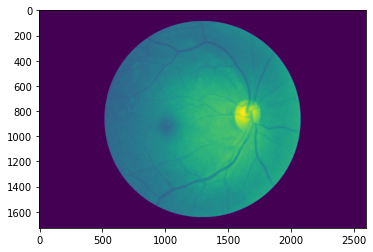

In [3]:
plt.imshow(img)

In [4]:
img.shape

(1728, 2592)

In [5]:
img.resize(img.shape[0]*img.shape[1])

In [6]:
img.shape

(4478976,)

In [7]:
for filename in os.listdir('Actual Training Images/'):
    print(filename)

.DS_Store
amd
cataracts
diabetes
glaucoma
hypertension
myopia
normal


In [78]:
def getImagesAndLabels(root):
    foldernames = [root+'amd-cropped/',root+'cataracts-cropped/',root+'diabetes-cropped/',root+'glaucoma-cropped/', root+'myopia-cropped/',root+'hypertension-cropped/',root+'normal-cropped/'
                   ]
    y = []
    X = []
    ROW = 224
    COL = 224

    for i in range(7):
        print(str(i), foldernames[i])
        for imgName in os.listdir(foldernames[i]):

            image = cv2.imread(foldernames[i] + imgName)
            try:
                image = cv2.resize(image, (ROW, COL))
                X.append(np.array(image).flatten())
                y.append(i)
            except:
                a=1


    return np.array(X), np.array(y)


X_train, y_train = getImagesAndLabels('Actual Training Cropped Images/') 
X_test, y_test = getImagesAndLabels('Actual Testing Cropped Images/') 

0 Actual Training Cropped Images/amd-cropped/
1 Actual Training Cropped Images/cataracts-cropped/
2 Actual Training Cropped Images/diabetes-cropped/
3 Actual Training Cropped Images/glaucoma-cropped/
4 Actual Training Cropped Images/myopia-cropped/
5 Actual Training Cropped Images/hypertension-cropped/
6 Actual Training Cropped Images/normal-cropped/


KeyboardInterrupt: 

In [39]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4022, 150528), (4022,), (1516, 150528), (1516,))

In [40]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
rf.score(X_test,y_test)

0.8674142480211082

In [58]:
y_pred = rf.predict(X_test)
prob_preds = rf.predict_proba(X_test)
from sklearn.metrics import roc_auc_score, f1_score
f1_score(y_pred, y_test, average='weighted')

6

603
1217
1108
134
1092
87
89
576
989
429


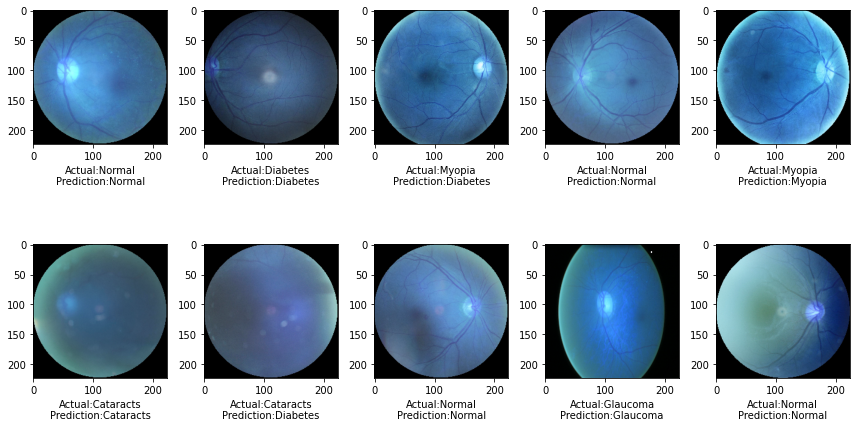

In [107]:
plt.figure(figsize=(12,7))
for i in range(10):
    foo= [603,1217,1108,134,1092,87,89,576,989,429]
    samp = foo[i] #[603,1217,410,134,1092,187,87,89,989,429]
    #samp = random.choice(range(len(X_test)))
    print(samp)
    image = X_test[samp]
    image = image.reshape(224,224,3)
    category = y_test[samp]
    pred_category = y_pred[samp]
    if category == 0:
        label = "AMD"
    elif category == 1:
        label = "Cataracts"
    elif category == 6:
        label = "Diabetes"
    elif category == 3:
        label = "Glaucoma"
    elif category == 4:
        label = "Hypertension"
    elif category == 5:
        label = "Myopia"
    elif category == 2:
        label = "Normal"
    if pred_category == 0:
        pred_label = "AMD"
    elif pred_category == 1:
        pred_label = "Cataracts"
    elif pred_category == 6:
        pred_label = "Diabetes"
    elif pred_category == 3:
        pred_label = "Glaucoma"
    elif pred_category == 4:
        pred_label = "Hypertension"
    elif pred_category == 5:
        pred_label = "Myopia"
    elif pred_category == 2:
        pred_label = "Normal"

    plt.subplot(2,5,i+1)
    plt.imshow(image, cmap = "gray")
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()

In [99]:
from sklearn.model_selection import GridSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
''''max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
               'n_estimators': n_estimators
               '''

param_grid = {'n_estimators': [2000],
              'max_depth': max_depth
               }


grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 6, verbose = 10)

In [31]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [59]:
grid_search.fit(X_train, y_train)

grid_search.best_params_

best_grid = grid_search.best_estimator_



Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed: 13.7min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed: 24.9min
[Parallel(n_jobs=6)]: Done   9 out of  18 | elapsed: 35.8min remaining: 35.8min
[Parallel(n_jobs=6)]: Done  11 out of  18 | elapsed: 44.5min remaining: 28.3min
[Parallel(n_jobs=6)]: Done  13 out of  18 | elapsed: 54.3min remaining: 20.9min
[Parallel(n_jobs=6)]: Done  15 out of  18 | elapsed: 55.8min remaining: 11.2min
[Parallel(n_jobs=6)]: Done  18 out of  18 | elapsed: 64.6min finished


In [60]:
best_grid.score( X_test, y_test)


0.8746701846965699

In [61]:
straight_preds = best_grid.predict(X_test)
from sklearn.metrics import roc_auc_score, f1_score
f1_score(straight_preds, y_test, average='weighted')

0.9037661989670733